# Road Traffic Accident Data

### 01 Data Preprocessing
 1. Understand the Data
 2. Handle Missing Values
 3. Handle Duplicates
 4. Handle Outliers
 5. Handle Incorrect or Inconsistent Data
 6. Encode Categorical Variables
 7. Save Processed Data

### 1. Understand the Data
* Load the dataset (CSV, Excel, JSON, SQL, etc.).
* Check the structure of the dataset (rows, columns, data types,statis etc).

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np

In [2]:
# I have data in 2 files so we will combine and use it.
df1 = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\Accident prediction\Datasets\raw\RTA Dataset.csv")
df2 = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\Accident prediction\Datasets\raw\RTADatasetE1.csv")

In [3]:
df1.shape,df2.shape

((12316, 32), (2889, 30))

In [4]:
df1.columns.difference(df2.columns)

Index(['Number_of_casualties', 'Number_of_vehicles_involved'], dtype='object')

In [5]:
df = pd.concat([df1,df2],axis =0)


In [6]:
df.shape

(15205, 32)

In [7]:
df_copy = df.copy()

In [8]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15205 entries, 0 to 2888
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         15205 non-null  object 
 1   Day_of_week                  15205 non-null  object 
 2   Age_band_of_driver           15205 non-null  object 
 3   Sex_of_driver                15205 non-null  object 
 4   Educational_level            14464 non-null  object 
 5   Vehicle_driver_relation      14626 non-null  object 
 6   Driving_experience           14376 non-null  object 
 7   Type_of_vehicle              14255 non-null  object 
 8   Owner_of_vehicle             14723 non-null  object 
 9   Service_year_of_vehicle      11277 non-null  object 
 10  Defect_of_vehicle            10778 non-null  object 
 11  Area_accident_occured        14966 non-null  object 
 12  Lanes_or_Medians             14820 non-null  object 
 13  Road_allignment       

In [10]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [11]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [12]:
df.columns = map(lambda x: x.strip().lower(), df.columns)

In [13]:
df.columns

Index(['time', 'day_of_week', 'age_band_of_driver', 'sex_of_driver',
       'educational_level', 'vehicle_driver_relation', 'driving_experience',
       'type_of_vehicle', 'owner_of_vehicle', 'service_year_of_vehicle',
       'defect_of_vehicle', 'area_accident_occured', 'lanes_or_medians',
       'road_allignment', 'types_of_junction', 'road_surface_type',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'type_of_collision', 'number_of_vehicles_involved',
       'number_of_casualties', 'vehicle_movement', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'work_of_casuality', 'fitness_of_casuality', 'pedestrian_movement',
       'cause_of_accident', 'accident_severity'],
      dtype='object')

In [14]:
df.nunique()

time                           1074
day_of_week                       7
age_band_of_driver                5
sex_of_driver                     3
educational_level                 7
vehicle_driver_relation           4
driving_experience                7
type_of_vehicle                  17
owner_of_vehicle                  4
service_year_of_vehicle           6
defect_of_vehicle                 3
area_accident_occured            15
lanes_or_medians                  8
road_allignment                   9
types_of_junction                 8
road_surface_type                 5
road_surface_conditions           4
light_conditions                  4
weather_conditions                9
type_of_collision                10
number_of_vehicles_involved       6
number_of_casualties              8
vehicle_movement                 13
casualty_class                    4
sex_of_casualty                   4
age_band_of_casualty              6
casualty_severity                 7
work_of_casuality           

In [15]:
df['day_of_week'].value_counts()

day_of_week
Friday       2517
Thursday     2294
Wednesday    2239
Tuesday      2184
Saturday     2105
Monday       2066
Sunday       1800
Name: count, dtype: int64

In [16]:
df['cause_of_accident'].value_counts()

cause_of_accident
No distancing                           2822
Changing lane to the right              2232
Changing lane to the left               1783
Driving carelessly                      1739
No priority to vehicle                  1484
Moving Backward                         1405
No priority to pedestrian                881
Other                                    554
Overtaking                               527
Driving under the influence of drugs     429
Driving to the left                      351
Getting off the vehicle improperly       241
Driving at high speed                    217
Overturning                              192
Turnover                                 106
Overspeed                                 81
Overloading                               72
Drunk driving                             32
Unknown                                   29
Improper parking                          28
Name: count, dtype: int64

In [17]:
df.groupby('accident_severity').size()

accident_severity
Fatal injury        189
Serious Injury     2135
Slight Injury     12881
dtype: int64

### 2.Handle Missing Values
* Identify missing values (df.isnull().sum()).
* Decide how to handle them:
* Remove rows/columns if missing values are too many.
* Impute values using mean, median, mode, or predictive modeling.



In [18]:
df.isnull().sum()

time                              0
day_of_week                       0
age_band_of_driver                0
sex_of_driver                     0
educational_level               741
vehicle_driver_relation         579
driving_experience              829
type_of_vehicle                 950
owner_of_vehicle                482
service_year_of_vehicle        3928
defect_of_vehicle              4427
area_accident_occured           239
lanes_or_medians                385
road_allignment                 142
types_of_junction               887
road_surface_type               172
road_surface_conditions           0
light_conditions                  0
weather_conditions                0
type_of_collision               155
number_of_vehicles_involved    2889
number_of_casualties           2889
vehicle_movement                308
casualty_class                    0
sex_of_casualty                   0
age_band_of_casualty           1042
casualty_severity                 0
work_of_casuality           

In [19]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

for col in df.columns:
  df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))[:, 0]


In [20]:
df.isnull().sum()

time                           0
day_of_week                    0
age_band_of_driver             0
sex_of_driver                  0
educational_level              0
vehicle_driver_relation        0
driving_experience             0
type_of_vehicle                0
owner_of_vehicle               0
service_year_of_vehicle        0
defect_of_vehicle              0
area_accident_occured          0
lanes_or_medians               0
road_allignment                0
types_of_junction              0
road_surface_type              0
road_surface_conditions        0
light_conditions               0
weather_conditions             0
type_of_collision              0
number_of_vehicles_involved    0
number_of_casualties           0
vehicle_movement               0
casualty_class                 0
sex_of_casualty                0
age_band_of_casualty           0
casualty_severity              0
work_of_casuality              0
fitness_of_casuality           0
pedestrian_movement            0
cause_of_a

### 3. Handle Duplicates
* Check for duplicate rows ```df.duplicated().sum()```
* Remove duplicates if necessary `df.drop_duplicates()`.

In [21]:
df.duplicated().sum()

0

### 4. Handle Outliers
* Use boxplots, histograms, or IQR (Interquartile Range) method to detect outliers.
* Remove or transform outliers if they negatively impact the model.
##### Outlier Detection methods
* 1.Sorting method
* 2.Interquartile Range (IQR)
* 3.Using visualizations
* 4.Statistical outlier detection
* 5.Density-Based Spatial Clustering of Applications with Noise (DBSCAN

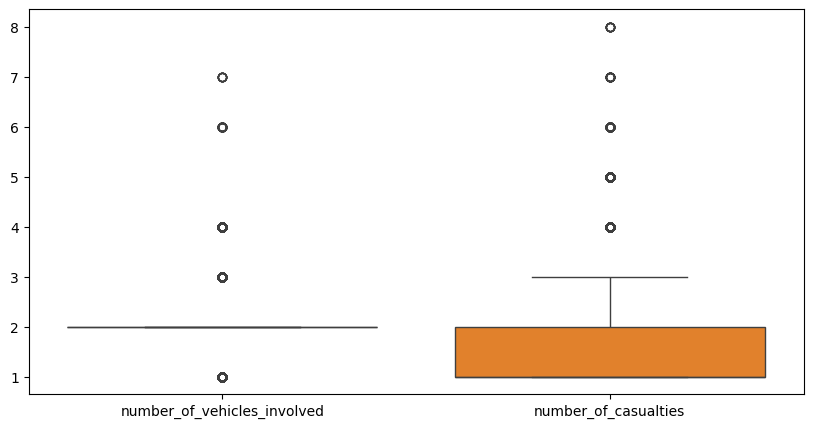

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

In [23]:
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


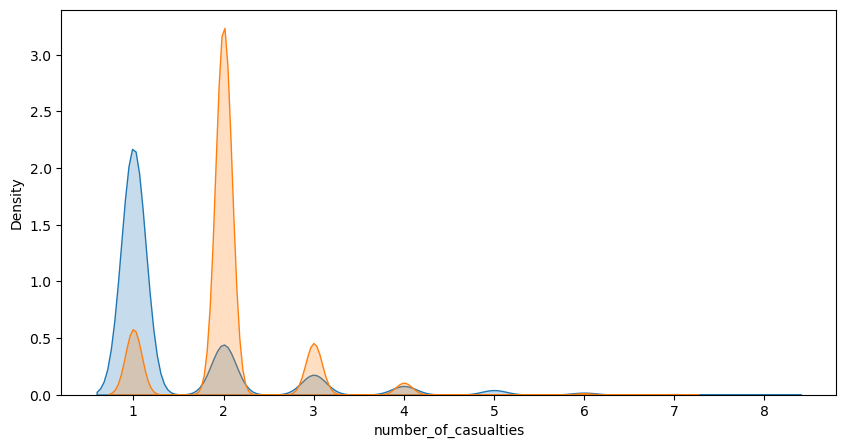

In [24]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['number_of_casualties'],fill=True)
sns.kdeplot(df['number_of_vehicles_involved'],fill=True)
plt.show()


In [25]:
df['number_of_casualties'].mean()

1.4439986846432096

In [26]:
df['area_accident_occured'].value_counts()

area_accident_occured
Other                              5023
Office areas                       4114
Residential areas                  2584
 Church areas                      1373
 Industrial areas                   572
School areas                        519
  Recreational areas                327
 Outside rural areas                288
 Hospital areas                     152
  Market areas                       84
Rural village areas                  68
  RecreatioNAl areas                 53
Rural village areasOffice areas      25
Unknown                              22
Recreational areas                    1
Name: count, dtype: int64

In [27]:
df['casualty_severity'].value_counts()

casualty_severity
3     7076
na    4443
3     2724
2      771
2      159
1       26
1        6
Name: count, dtype: int64

In [28]:
df.dtypes

time                            object
day_of_week                     object
age_band_of_driver              object
sex_of_driver                   object
educational_level               object
vehicle_driver_relation         object
driving_experience              object
type_of_vehicle                 object
owner_of_vehicle                object
service_year_of_vehicle         object
defect_of_vehicle               object
area_accident_occured           object
lanes_or_medians                object
road_allignment                 object
types_of_junction               object
road_surface_type               object
road_surface_conditions         object
light_conditions                object
weather_conditions              object
type_of_collision               object
number_of_vehicles_involved    float64
number_of_casualties           float64
vehicle_movement                object
casualty_class                  object
sex_of_casualty                 object
age_band_of_casualty     

### 5. Handle Incorrect or Inconsistent Data

In [29]:
df['time'] = pd.to_datetime(df['time'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_17776\2454786871.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


In [30]:
df.head()

,time,day_of_week,age_band_of_driver,sex_of_driver,educational_level,vehicle_driver_relation,driving_experience,type_of_vehicle,owner_of_vehicle,service_year_of_vehicle,...,vehicle_movement,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,work_of_casuality,fitness_of_casuality,pedestrian_movement,cause_of_accident,accident_severity
0,2025-02-09 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,2025-02-09 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2025-02-09 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2025-02-09 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2025-02-09 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


### 7.Save the preprocessed data

In [31]:
df.to_csv('processed_data.csv', index=False)